  
  Este código busca treinar um modelo de aprendizado de máquina que responda corretamente se uma pessoa sobreviveu ou não ao naufrágio do Titanic com base nos dados (12 variáveis diferentes) de 891 passageiros.

  This code aims to train a machine learning model that predicts correctly if a person survived or not the Titanic wreck based on the data (12 differente variables) of 891 passangers.


  Importando as bibliotecas:

  Importing the libraries:
  

In [37]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


Carregando a Base de Dados:

Loading the Database:


In [38]:

data = pd.read_csv('titanic.csv')



Fazendo uma breve análise dos dados:

Briefly analyzing the data:


In [39]:

for column in data.columns:
    if len(data[column])-data[column].count() > 0:
        print(f'A coluna {column} tem {round((len(data[column])-data[column].count())/len(data[column])*100,2)}% de valores nulos')


A coluna Age tem 19.87% de valores nulos
A coluna Cabin tem 77.1% de valores nulos
A coluna Embarked tem 0.22% de valores nulos



Pode-se observar que a coluna 'Cabine' possui uma quantidade elevada de valores nulos (77%), que precisam ser deletados. A coluna de idade também possui um número expressivo de valores nulos (19%), que serão substituídos pela idade média dos passageiros:

It's easy to tell that the column 'Cabin' has a considerably large amount of null values (77%), wich need be deleted.The column 'Age' also has a significant amount of null values ​​(19%), and these will be replaced by the average age of passengers:


In [40]:

data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.drop('Cabin', axis=1)



As outras 2 linhas contendo valores nulos serão excluídas:

The other 2 rows containing null values will be deleted:



In [41]:

data = data.dropna()



Algumas colunas não aumentariam a precisão do modelo, portanto elas serão retiradas do banco de dados:

A few columns would not increase the model's accuracy, so they will be dropped from the Database:


In [42]:

to_drop_columns = ['Name', 'Ticket', 'PassengerId', 'Embarked' ]
for column in to_drop_columns:
    data = data.drop(column, axis=1)
    


A meta (que é se a pessoa sobreviveu ou não) é separado dos demais preditores:

The target (wich is if the person survived or not) is splited from the rest:


In [43]:

target = data['Survived']
predictors = data.drop('Survived', axis=1)



Todas as colunas preditivas são numéricas, excetuando 'Sexo', então seus valores serão definidos como 1 ou 0:

All of the predictory columns are numeric, except for the 'Sex', so its values will be labeled as 1 or 0:



In [44]:

labeler = LabelEncoder()
predictors['Sex'] = labeler.fit_transform(predictors['Sex'])  
  


Os preditores precisam ser escalonados para aumentar a eficiência do modelo:

The predictors need to be staggered to increase the model's eficiency:



In [45]:

scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)



A meta e os preditores são separados nos dados de treinamento e teste (tamanho do teste = 20%):

The target and the predictors are both separeted in training and testing data (test size = 20%):


In [46]:

predictors_test, predictors_train, target_test, target_train = train_test_split(predictors, target, test_size=0.2)



Uma vez que os dados estão corretamente modelados, o KNN é importado, no qual os dados de treino (preditoras e alvo) são aplicados, usando o número de 5 vizinhos na análise:

Once the data is correctly modeled the KNN Method is imported, in which the training data (predictors and target) are fitted in, using 5 as the number of neighbors:


In [47]:

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(predictors_train, target_train)
predictions = classifier.predict(predictors_test)



 Para medir a precisão do modelo, é necessário comparar as previsões feitas por ele, usando o predictors_test, e compará-lo com o target_test:

 In order to measure how accurate was the model, is needed to compare the predictions made by it, using the predictors_test, and compare it with the target_test:
 

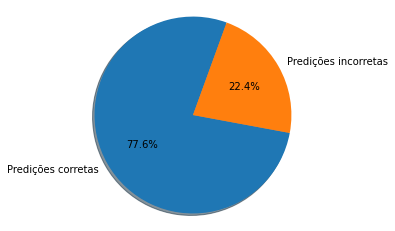

In [48]:

accuracy = accuracy_score(predictions, target_test)
labels = 'Predições corretas', 'Predições incorretas'
sizes = [accuracy, 1-accuracy] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=70, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

O modelo tem precisão de aproximadamente 77%. De forma que, o modelo tem a probabilidade de 77% de responder corretamente se o passageiro sobreviveu ou não baseado em seus dados.

The model has the accuracy of approximately 77%. So, the model has the probability of 77% of answering correctly if the passenger survived or not based on its data.  